# Word-Embeddings

Credit to --> [Yuriy Guts](https://github.com/YuriyGuts) 

## Imports

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [3]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Set up logging**

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

**Download NLTK tokenizer models (only the first time)**

In [6]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sultan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Prepare Corpus

In [7]:
# change the current directory to read the data
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

In [8]:
df = pd.read_csv('CombinedData.csv', engine='python')

In [9]:
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [10]:
# Rename col 0
df.columns = ['word','organization','year']
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [11]:
corpus = df.word
# Join the elements and sperate them by a single space
corpus = ' '.join(word for word in corpus)

In [12]:
corpus[:196]

'fiscal year adopted budget brenda jones county manager sharisse fuller assistant county managerhuman resources director prepared office budget management evaluation michael halford budget director'

In [13]:
# change the current directory to read the data
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData\TextFiles") 

# Creating a text file
text_data = open("CombinedData.txt","a") 

# Writing the string to the file
text_data.write(corpus)

# Closing the file
text_data.close() 

**Load files**

In [14]:
bgt_filename = "CombinedData.txt"

In [15]:
corpus_raw = u""
print("Reading '{0}'...".format(bgt_filename))
with codecs.open(bgt_filename, "r", "utf-8") as book_file:
    corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'CombinedData.txt'...
Corpus is now 160758576 characters long



**Split the corpus into sentences**

In [16]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [17]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [18]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [19]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [20]:
token_count = sum([len(sentence) for sentence in sentences])
print("corpus contains {0:,} tokens".format(token_count))

corpus contains 19,106,515 tokens


## Train Word2Vec

In [21]:
# Dimensionality of the resulting word vectors.
num_features = 300

# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

In [22]:
bgt2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
    
)

In [23]:
bgt2vec.build_vocab(sentences)

2019-12-11 11:09:21,326 : INFO : collecting all words and their counts
2019-12-11 11:09:21,364 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-11 11:09:29,884 : INFO : collected 34079 word types from a corpus of 19106515 raw words and 1 sentences
2019-12-11 11:09:29,930 : INFO : Loading a fresh vocabulary
2019-12-11 11:09:31,864 : INFO : effective_min_count=3 retains 34079 unique words (100% of original 34079, drops 0)
2019-12-11 11:09:31,864 : INFO : effective_min_count=3 leaves 19106515 word corpus (100% of original 19106515, drops 0)
2019-12-11 11:09:32,199 : INFO : deleting the raw counts dictionary of 34079 items
2019-12-11 11:09:32,214 : INFO : sample=0.001 downsamples 42 most-common words
2019-12-11 11:09:32,228 : INFO : downsampling leaves estimated 17528938 word corpus (91.7% of prior 19106515)
2019-12-11 11:09:32,499 : INFO : estimated required memory for 34079 words and 300 dimensions: 98829100 bytes
2019-12-11 11:09:32,499 : INFO : resetti

In [24]:
print("Word2Vec vocabulary length:", len(bgt2vec.wv.vocab))

Word2Vec vocabulary length: 34079


**Start training**

In [25]:
bgt2vec.train(sentences, total_examples=bgt2vec.corpus_count, epochs=50)

2019-12-11 11:09:34,386 : INFO : training model with 3 workers on 34079 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2019-12-11 11:09:34,836 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-11 11:09:34,852 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-11 11:09:35,590 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-11 11:09:35,590 : INFO : EPOCH - 1 : training on 19106515 raw words (10000 effective words) took 0.8s, 12621 effective words/s
2019-12-11 11:09:35,624 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-11 11:09:35,624 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-11 11:09:36,255 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-11 11:09:36,255 : INFO : EPOCH - 2 : training on 19106515 raw words (10000 effective words) took 0.6s, 15622 effective words/s
2019-12-11 11:09:36,270 : INFO : w

2019-12-11 11:09:45,053 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-11 11:09:45,057 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-11 11:09:45,513 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-11 11:09:45,513 : INFO : EPOCH - 21 : training on 19106515 raw words (10000 effective words) took 0.5s, 20711 effective words/s
2019-12-11 11:09:45,528 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-11 11:09:45,544 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-11 11:09:46,062 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-11 11:09:46,062 : INFO : EPOCH - 22 : training on 19106515 raw words (10000 effective words) took 0.5s, 18850 effective words/s
2019-12-11 11:09:46,080 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-11 11:09:46,095 : INFO : worker thread finished; awaiting finish of 1 more threads


2019-12-11 11:09:54,538 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-11 11:09:55,193 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-11 11:09:55,193 : INFO : EPOCH - 41 : training on 19106515 raw words (10000 effective words) took 0.7s, 14680 effective words/s
2019-12-11 11:09:55,215 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-11 11:09:55,230 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-11 11:09:55,736 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-11 11:09:55,736 : INFO : EPOCH - 42 : training on 19106515 raw words (10000 effective words) took 0.5s, 19093 effective words/s
2019-12-11 11:09:55,752 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-11 11:09:55,768 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-11 11:09:56,171 : INFO : worker thread finished; awaiting finish of 0 more threads


(500000, 955325750)

**Save to file, can be useful later**

In [26]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [27]:
bgt2vec.save(os.path.join("trained", "bgt2vec.w2v"))

2019-12-11 11:09:59,510 : INFO : saving Word2Vec object under trained\bgt2vec.w2v, separately None
2019-12-11 11:09:59,527 : INFO : not storing attribute vectors_norm
2019-12-11 11:09:59,548 : INFO : not storing attribute cum_table
2019-12-11 11:10:02,988 : INFO : saved trained\bgt2vec.w2v


## Explore the trained model.

In [28]:
bgt2vec = w2v.Word2Vec.load(os.path.join("trained", "bgt2vec.w2v"))

2019-12-11 11:10:03,030 : INFO : loading Word2Vec object from trained\bgt2vec.w2v
2019-12-11 11:10:05,107 : INFO : loading wv recursively from trained\bgt2vec.w2v.wv.* with mmap=None
2019-12-11 11:10:05,111 : INFO : setting ignored attribute vectors_norm to None
2019-12-11 11:10:05,111 : INFO : loading vocabulary recursively from trained\bgt2vec.w2v.vocabulary.* with mmap=None
2019-12-11 11:10:05,111 : INFO : loading trainables recursively from trained\bgt2vec.w2v.trainables.* with mmap=None
2019-12-11 11:10:05,115 : INFO : setting ignored attribute cum_table to None
2019-12-11 11:10:05,119 : INFO : loaded trained\bgt2vec.w2v


### Compress the word vectors into 2D space and plot them

In [29]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [30]:
all_word_vectors_matrix = bgt2vec.wv.syn0

C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


**Train t-SNE**

In [31]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

**Plot the big picture**

In [32]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[bgt2vec.wv.vocab[word].index])
            for word in bgt2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [33]:
points.head(10)

,word,x,y
0,fiscal,-11.437481,-36.145351
1,year,-11.402778,-36.059891
2,adopted,-17.709024,-39.304352
3,budget,-11.669227,-31.599075
4,brenda,-13.163054,-32.674278
5,jones,-13.088961,-32.647301
6,county,-13.468078,-35.686249
7,manager,-11.438896,-32.583675
8,sharisse,-12.768707,-32.269840
9,fuller,-12.710531,-32.217945


In [34]:
sns.set_context("poster")

**Zoom in to some interesting places**

In [36]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

**words related endup together**

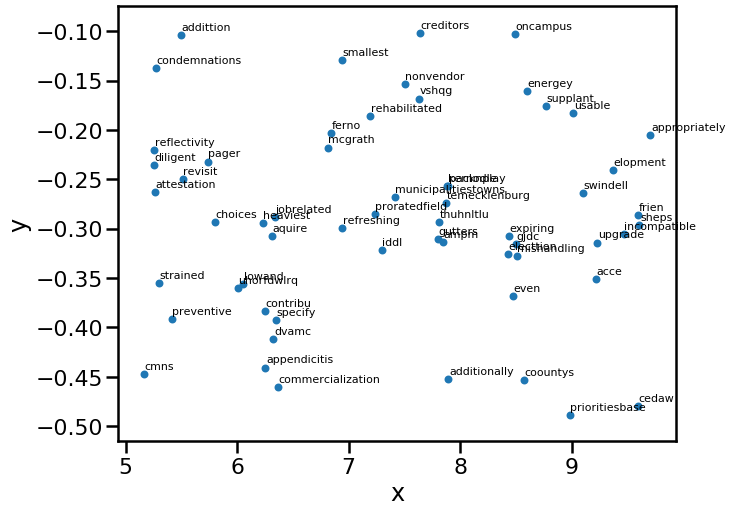

In [37]:
plot_region(x_bounds=(5, 10), y_bounds=(-0.5, -0.1))

### Explore semantic similarities between words

**Words closest to the given word**

In [38]:
bgt2vec.most_similar("guilford")

C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-12-11 12:16:26,141 : INFO : precomputing L2-norms of word weight vectors


[('technical', 0.7925680875778198),
 ('making', 0.7882285118103027),
 ('attached', 0.7857143878936768),
 ('ordained', 0.7799639105796814),
 ('profile', 0.7693620324134827),
 ('mobility', 0.768927812576294),
 ('nine', 0.7650311589241028),
 ('external', 0.7636074423789978),
 ('healththe', 0.76360023021698),
 ('operation', 0.762910783290863)]

In [39]:
bgt2vec.most_similar("year")

C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fiscal', 0.8832362294197083),
 ('close', 0.834098219871521),
 ('begins', 0.8308687210083008),
 ('colleges', 0.8279870748519897),
 ('certified', 0.824294924736023),
 ('adopt', 0.8232169151306152),
 ('accountant', 0.8225964307785034),
 ('subdivisions', 0.81988924741745),
 ('independently', 0.8144859671592712),
 ('projections', 0.8140947222709656)]

**Linear relationships between word pairs**

In [40]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = bgt2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [41]:
nearest_similarity_cosmul("guilford","county","year")

guilford is related to county, as fiscal is related to year


C:\Users\Sultan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'fiscal'